<a href="https://www.peqnp.com"><img border="0" alt="PEQNP" src="https://raw.githubusercontent.com/maxtuno/PEQNP/master/logo.png" width="640" height="400">

# PEQNP [![Downloads](https://pepy.tech/badge/peqnp)]
## MATHEMATICAL SOLVER

The PEQNP system its an automatic CNF compiler and interpreter integrated with Python.

# INSTALLATION
```python
pip install PEQNP
```

In [1]:
!pip install SATX --upgrade --force

     |████████████████████████████████| 71kB 5.9MB/s 
  Created wheel for SATX: filename=SATX-0.2.1-cp37-cp37m-linux_x86_64.whl size=478680 sha256=a5ab78d73c7332209b3785802bdaa81eccb840e89cb8f56e1afd92b8f9975569
  Stored in directory: /root/.cache/pip/wheels/3a/94/03/2c0dd5826b36029495fb692dd162e4006fe682256cf101025f
Successfully built SATX


# INTRODUCION
On PEQNP all elements are integers, the relations are at bit level or arithmetic level. All integers live on $\mathbb{N}_{2 ^ {bits} - 1}$ and always positives, i.e. for two integer $(x, y)$ the operation, $(x - y)$ take all possibilities such that $x - y >= 0$.

# SUPPORTED OPERATIONS
$+$, $-$, $*$, $/$, $**$, $abs$, $powmod$, $\%$, $\&$, $|$, $^$, $==$, $=$, $<$, $<=$, $>$, $>=$

# FIND ALL SOLUTIONS TO $2^n-7=x^2$

Ref: http://www.artofproblemsolving.com/Forum/viewtopic.php?t=66245

In [2]:
import satx as cnf

cnf.engine(32)

_2 = cnf.constant(2)
n = cnf.natural()
x = cnf.natural()

assert _2 ** n - 7 == x ** 2

while cnf.satisfy():
    print(n, x)

4 3
7 11
5 5
3 1
15 181


SOLVE IN POSITIVE INTEGERS THE FOLLOWING EQUATION: $n^3 − 5n + 10 = 2^k$.

Ref: http://www.artofproblemsolving.com/Forum/viewtopic.php?t=103239

tip: avoid the negative signs

In [3]:
import satx as cnf

cnf.engine(16)

_2 = cnf.constant(2)

n = cnf.natural()
k = cnf.natural()

assert n ** 3 + 10 == _2 ** k + 5 * n

while cnf.satisfy():
    print(n, k)

2 3


# FIND ALL POSITIVE INTEGER SOLUTIONS TO $a^{2}=b^{3}+1$

Ref: http://www.artofproblemsolving.com/Forum/viewtopic.php?t=103239

In [4]:
import satx as cnf

cnf.engine(16)

a = cnf.natural()
b = cnf.natural()

assert a ** 2 == b ** 3 + 1

while cnf.satisfy():
    print(a, b)

3 2
1 0


# FIND ALL POSITIVE INTEGER SOLUTIONS TO  $x,y$: $3^x - 1 == y2^x + 1$

ref: http://www.artofproblemsolving.com/Forum/viewtopic.php?t=31947

In [5]:
import satx as cnf

cnf.engine(32)

_2 = cnf.constant(2)
_3 = cnf.constant(3)

x = cnf.natural()
y = cnf.natural()

assert _3 ** x == y * _2 ** x + 1

while cnf.satisfy():
    print(x, y)

0 0
4 5
1 1
2 2


# INTEGER FACTORIZATION
In number theory, integer factorization is the decomposition of a composite number into a product of smaller integers. If these factors are further restricted to prime numbers, the process is called prime factorization.

In [6]:
import satx as cnf

rsa = 3007

cnf.engine(rsa.bit_length())

p = cnf.natural()
q = cnf.natural()

assert p * q == rsa

while cnf.satisfy():
    print(p, q)

3007 1
31 97
97 31
1 3007


# PALINDROMIC NUMBERS (Bits Level)

In [7]:
import numpy as np
import satx as cnf

cnf.engine(10)

x = cnf.natural()

# without "copy" for inplace reverse of bits
assert x == x.reverse(copy=True)

while cnf.satisfy():
    print(x, np.binary_repr(x.value, cnf.bits()))

180 0010110100
132 0010000100
204 0011001100
72 0001001000
330 0101001010
843 1101001011
891 1101111011
819 1100110011
951 1110110111
693 1010110101
252 0011111100
120 0001111000
378 0101111010
633 1001111001
771 1100000011
258 0100000010
390 0110000110
0 0000000000
48 0000110000
561 1000110001
765 1011111101
438 0110110110
903 1110000111
645 1010000101
975 1111001111
462 0111001110
717 1011001101
585 1001001001
513 1000000001
1023 1111111111
510 0111111110
306 0100110010


# XOR Problem

The XOr, or “exclusive or”, problem is a classic problem in ANN research. It is the problem of using a neural network to predict the outputs of XOr logic gates given two binary inputs. An XOr function should return a true value if the two inputs are not equal and a false value if they are equal.

In [8]:
import satx as cnf

x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

n, m = len(x), len(x[0])

cnf.engine(10)

w = cnf.matrix(dimensions=(n, m), signed=False)
b = cnf.vector(size=n, signed=False)

for i in range(n):
    assert y[i] == cnf.dot(x[i], w[i]) + b[i]

if cnf.satisfy():
    for i in range(n):
        print(x[i], cnf.dot(x[i], w[i]) + b[i])
else:
    print('Infeasible ...')

[0, 0] 0
[0, 1] 1
[1, 0] 1
[1, 1] 0


# ABSOLUTE VALUES

In [9]:
import satx as cnf

cnf.engine(4)

x = cnf.natural()
y = cnf.natural()

assert abs(x - y) == 1

while cnf.satisfy():
    print(x, y, x - y, abs(x - y))

12 11 1 1
10 9 1 1
14 13 1 1
10 11 -1 1
11 10 1 1
9 8 1 1
0 15 -15 15
8 7 1 1
3 2 1 1
14 15 -1 1
4 3 1 1
2 1 1 1
11 12 -1 1
15 0 15 15
9 10 -1 1
8 9 -1 1
7 8 -1 1
1 0 1 1
3 4 -1 1
13 14 -1 1
15 14 1 1
7 6 1 1
2 3 -1 1
1 2 -1 1
13 12 1 1
6 5 1 1
0 1 -1 1
12 13 -1 1
4 5 -1 1
5 4 1 1
5 6 -1 1
6 7 -1 1


# CENTROID

2 5


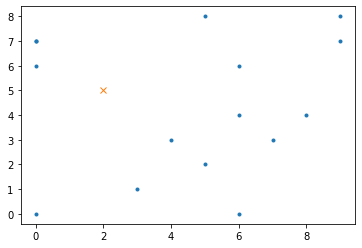

In [11]:
import numpy as np
import satx as cnf
import matplotlib.pyplot as plt

n = 15

data = np.random.randint(0, 10, size=(n, 2))

opt = 1
while True:
    cnf.engine(10)

    x = cnf.natural()
    y = cnf.natural()

    assert sum(abs(xy[0] - x) + abs(xy[1] - y) for xy in data) < opt

    assert x <= 10
    assert y <= 10

    if cnf.satisfy(turbo=True):        
        print(x, y)
        a, b = zip(*data)
        plt.plot(a, b, '.')
        plt.plot(x, y, 'x')
        plt.show()
        break
    else:
        opt += 1

# FERMAT'S FACTORIZATION METHOD

Note: when there is a negative number in the model, increment the bits by 1.

In [12]:
import satx as cnf

rsa = 3007

cnf.engine(rsa.bit_length() + 1)

p = cnf.natural()
q = cnf.natural()

assert p ** 2 - q ** 2 == rsa
assert q < p

if cnf.satisfy(turbo=True):
    print(p, q, p + q, p - q)
else:
    print('Is Prime!')

64 33 97 31


# EXPONENTIAL DIOPHANTINE EQUATIONS


In [13]:
import satx as cnf

cnf.engine(16)

x = cnf.natural()
y = cnf.natural()
z = cnf.natural()

assert x ** y == z

while cnf.satisfy():
    print(x, y, z)

3 9 19683
1 5 1
1 9 1
3 8 6561
1 7 1
3 5 243
1 3 1
0 8 0
3 6 729
1 2 1
0 2 0
0 3 0
0 9 0
0 6 0
0 7 0
1 6 1
2 7 128
3 2 9
2 9 512
1 8 1
1 4 1
2 5 32
3 4 81
2 8 256
0 1 0
3 7 2187
3 0 1
2 2 4
2 3 8
2 1 2
2 4 16
0 4 0
0 5 0
3 1 3
0 0 1
2 0 1
1 0 1
3 3 27
1 1 1
2 6 64


# ON THE DIOPHANTINE EQUATION $x^2 + c = 3^n$ WITH $x, c, n > 1$

In [14]:
import satx as cnf

n = 32

cnf.engine(n.bit_length())

_3 = cnf.constant(3)
n = cnf.natural()
x = cnf.natural()
c = cnf.natural()

assert x ** 2 + c == _3 ** n
assert x > 1
assert c > 1
assert n > 1

if cnf.satisfy(turbo=True):
    print(n, x, c)
else:
    print('Infeasible for bit range...')

3 4 11


# FACTORIALS

In [15]:
import math
import satx as cnf

cnf.engine(32)

x = cnf.natural()

cnf.factorial(x) == math.factorial(10)

if cnf.satisfy(turbo=True):
    print(x)
else:
    print('Need more bits!')

10


# $\Sigma$

In [16]:
import satx as cnf

cnf.engine(16)

x = cnf.natural()
n = cnf.natural()

cnf.sigma(lambda k: k ** 2, 1, n) == x

while cnf.satisfy():
    print(x, n, sum(k ** 2 for k in range(1, n.value + 1)))


55 5 55
506 11 506
0 0 0
385 10 385
650 12 650
819 13 819
1015 14 1015
30 4 30
91 6 91
14 3 14
140 7 140
285 9 285
204 8 204
5 2 5
1 1 1


# $\Pi$

In [31]:
import functools
import operator
import math
import satx as cnf

cnf.engine(32)

x = cnf.natural()
n = cnf.natural()

cnf.pi(lambda k: k ** 2, 1, n) == x
assert 0 < x <= 2 ** math.log(cnf.oo()) # limit the CNF overflow
assert n > 0

while cnf.satisfy():
    print(x, n, functools.reduce(operator.mul, (k ** 2 for k in range(1, n.value + 1))))

1 1 1
14400 5 14400
4 2 4
576 4 576
36 3 36
518400 6 518400


# PEQNP VS FIBONACCI NUMBERS | N VS TIME

2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55
11 89
12 144
13 233
14 377
15 610
16 987
17 1597
18 2584
19 4181
20 6765
21 10946
22 17711
23 28657
24 46368
25 75025
26 121393
27 196418
28 317811
29 514229
30 832040
31 1346269
32 2178309
33 3524578
34 5702887
35 9227465
36 14930352
37 24157817
38 39088169
39 63245986
40 102334155
41 165580141
42 267914296
43 433494437
44 701408733
45 1134903170
46 1836311903
47 2971215073
48 4807526976
49 7778742049
50 12586269025
51 20365011074
52 32951280099
53 53316291173
54 86267571272
55 139583862445
56 225851433717
57 365435296162
58 591286729879
59 956722026041
60 1548008755920
61 2504730781961
62 4052739537881
63 6557470319842
64 10610209857723
65 17167680177565
66 27777890035288
67 44945570212853
68 72723460248141
69 117669030460994
70 190392490709135
71 308061521170129
72 498454011879264
73 806515533049393
74 1304969544928657
75 2111485077978050
76 3416454622906707
77 5527939700884757
78 8944394323791464
79 14472334024676221
80 23416728348467685
81 

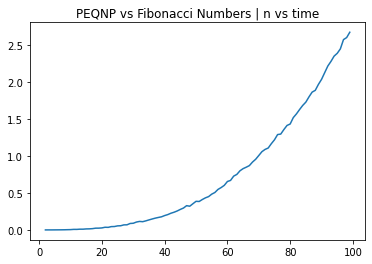

In [34]:
import time
import satx as cnf
import matplotlib.pyplot as plt

ns, ts = [], []
for n in range(2, 100):

    cnf.engine(n)

    x = cnf.vector(size=n + 1, signed=False)

    assert x[0] == 0
    assert x[1] == 1
    for i in range(2, n + 1):
        assert x[i - 1] + x[i - 2] == x[i]

    ini = time.time()
    if cnf.satisfy(turbo=True):
        print(n, x[n])
    else:
        print('Infeasible ...')
    end = time.time()
    ns.append(n)
    ts.append(end - ini)

plt.title('PEQNP vs Fibonacci Numbers | n vs time')
plt.plot(ns, ts)
plt.show()

# TENSORS

Tensors object are the most advanced concept behind PEQNP, integers are tensors, work like integers, but their bits act like an multidimensional matrix of lambda functions.

Note: [[*]] for acces to lambda (bit) functions.

In [35]:
import satx as cnf

cnf.engine(10)

x = cnf.tensor(dimensions=(4))
y = cnf.tensor(dimensions=(2, 2))

assert x + y == 10
assert x[[0]](0, 1) == 1
assert y[[0, 0]](0, 1) == 1

while cnf.satisfy():
    print(x, y, x.binary, y.binary)

3 7 [True, True, False, False] [[True, True], [True, False]]
1 9 [True, False, False, False] [[True, False], [False, True]]
5 5 [True, False, True, False] [[True, False], [True, False]]
9 1 [True, False, False, True] [[True, False], [False, False]]
7 3 [True, True, True, False] [[True, True], [False, False]]


In [36]:
import numpy as np
import satx as cnf

n = 2

cnf.engine(4)

x = cnf.tensor(dimensions=(n, n))
a = cnf.natural()
b = cnf.natural()

assert sum(x[[i, j]](a ** 2 - b ** 3, a ** 3 - b ** 2) for i in range(n) for j in range(n)) == 0

while cnf.satisfy():
    print(a, b)
    print(np.vectorize(int)(x.binary))
    print()

1 1
[[0 1]
 [0 0]]

0 0
[[0 1]
 [0 0]]

1 1
[[0 1]
 [0 1]]

0 0
[[0 1]
 [0 1]]

0 0
[[1 1]
 [0 1]]

1 1
[[0 0]
 [0 0]]

1 1
[[1 1]
 [0 1]]

0 0
[[0 0]
 [0 1]]

0 0
[[0 1]
 [1 1]]

1 1
[[0 1]
 [1 1]]

1 1
[[1 1]
 [1 1]]

1 1
[[0 0]
 [1 0]]

1 1
[[0 1]
 [1 0]]

1 1
[[1 1]
 [0 0]]

0 0
[[1 0]
 [0 1]]

1 1
[[0 0]
 [0 1]]

0 0
[[0 0]
 [1 1]]

1 1
[[0 0]
 [1 1]]

0 0
[[0 0]
 [1 0]]

0 0
[[0 1]
 [1 0]]

0 0
[[1 1]
 [0 0]]

1 1
[[1 0]
 [0 0]]

1 1
[[1 0]
 [0 1]]

1 1
[[1 0]
 [1 1]]

0 0
[[1 1]
 [1 1]]

1 1
[[1 1]
 [1 0]]

0 0
[[1 1]
 [1 0]]

0 0
[[1 0]
 [1 1]]

0 0
[[1 0]
 [1 0]]

0 0
[[0 0]
 [0 0]]

0 0
[[1 0]
 [0 0]]

1 1
[[1 0]
 [1 0]]



# RSA FACTORIZATION WITH TENSORS

In [37]:
import satx as cnf

rsa = 3007

cnf.engine(rsa.bit_length())

p = cnf.tensor(dimensions=(cnf.bits()))
q = cnf.tensor(dimensions=(cnf.bits()))

assert p * q == rsa
assert p[[0]](0, 1) == 1
assert q[[0]](0, 1) == 1
assert sum(p[[i]](0, 1) for i in range(cnf.bits() // 2 + 1, cnf.bits())) == 0
assert sum(q[[i]](0, 1) for i in range(cnf.bits() // 2, cnf.bits())) == 0

if cnf.satisfy(turbo=True, log=True):
    print(p, q)
else:
    print('Is Prime!')

97 31


# SAT REFORMULATION WITH TENSORS

In [39]:
import functools
import operator
import sys

import satx as cnf


n, m, sat = 10, 24, [[9, -5, 10, -6, 3],
                     [6, 8],
                     [8, 4],
                     [-10, 5],
                     [-9, 8],
                     [-9, -3],
                     [-2, 5],
                     [6, 4],
                     [-2, -1],
                     [7, -2],
                     [-9, 4],
                     [-1, -10],
                     [-3, 4],
                     [7, 5],
                     [6, -3],
                     [-10, 7],
                     [-1, 7],
                     [8, -3],
                     [-2, -10],
                     [-1, 5],
                     [-7, 1, 9, -6, 3],
                     [-9, 6],
                     [-8, 10, -5, -4, 2],
                     [-4, -7, 1, -8, 2]]


if __name__ == '__main__':
    
    cnf.engine(bits=1)
    
    x = cnf.tensor(dimensions=(n,))
    
    assert functools.reduce(operator.iand, (functools.reduce(operator.ior, (x[[abs(lit) - 1]](lit < 0, lit > 0) for lit in cls)) for cls in sat)) == 1
    
    if cnf.satisfy(turbo=True, log=True):
        print('SAT')
        print(' '.join(map(str, [(i + 1) if b else -(i + 1) for i, b in enumerate(x.binary)])) + ' 0')
    else:
        print('')

SAT
-1 2 -3 4 5 -6 7 8 -9 -10 0


# SUM SUBSET PROBLEM WITH TENSORS

In [40]:
import numpy as np
import satx as cnf

universe = np.random.randint(1, 2 ** 16, size=100)
t = np.random.randint(min(universe), sum(universe))

cnf.engine(t.bit_length())

x = cnf.tensor(dimensions=(len(universe)))

assert sum(x[[i]](0, universe[i]) for i in range(len(universe))) == t

if cnf.satisfy(turbo=True):
    sub = [universe[i] for i in range(len(universe)) if x.binary[i]]
    print(t, sum(sub), sub)
else:
    print('Infeasible ...')

679117 679117 [21005, 3041, 7755, 21578, 21868, 20713, 18044, 9411, 21431, 58773, 32535, 32626, 19050, 6932, 46853, 62886, 29285, 55645, 54507, 26940, 5280, 23593, 36195, 10954, 28993, 3224]


# MULTISET RECONSTRUCTION BY DIFFERENCES

Given a sorted multiset, their differences and one tip (an element and position for only one arbitrary element), is possible recovery the original multiset?

In [41]:
import time
import random
import satx as cnf


def generator(n, max_val):
    return sorted([random.randint(1, max_val) for _ in range(n)])


def differences(lst):
    return [abs(lst[i] - lst[i - 1]) for i in range(1, len(lst))]


# 100 tests
for n in range(1, 10):

    m = random.randint(1, n ** 2)

    original = generator(n, m)
    diffs = differences(original)

    print('N, M         : {}, {}'.format(n, m))
    print('DIFFERENCES  : {}'.format(diffs))
    print('ORIGINAL     : {}'.format(original))

    # only one tip
    ith = random.choice(range(n))
    tip = original[ith]

    # init timer
    ini = time.time()

    # Empirical bits necessarily to solve the problem.
    cnf.engine(sum(diffs).bit_length() + 4)

    # Declare a n-vector of integer variables to store the solution.
    x = cnf.vector(size=n, signed=False)

    # The tip is on x at index ith
    assert tip == cnf.index(ith, x)

    # The i-th element of the instance is the absolute difference of two consecutive elements
    for i in range(n - 1):
        assert x[i] <= x[i + 1]
        assert cnf.index(i, diffs) == x[i + 1] - x[i]

    # Solve the problem for only one solution
    # Turbo parameter is a destructive simplification
    # Solve with all power os SLIME SAT Solver but only for the fist solution.
    if cnf.satisfy(turbo=True):
        o = [abs(x[i + 1] - x[i]) for i in range(n - 1)]
        c = 100 * len(set(map(int, x)).intersection(set(original))) / len(set(original))
        print('SOLVED       : {}'.format(x))
        print('COINCIDENCES : {}%'.format(c))
        if o == diffs:
            print('OK! - {}s'.format(time.time() - ini))
        else:
            print('NOK! - {}s'.format(time.time() - ini))
            raise Exception('ERROR!')
        if c != 100:
            raise Exception('Hypothesis Fail - 100%')

N, M         : 1, 1
DIFFERENCES  : []
ORIGINAL     : [1]
SOLVED       : [1]
COINCIDENCES : 100.0%
OK! - 0.0030510425567626953s
N, M         : 2, 2
DIFFERENCES  : [0]
ORIGINAL     : [1, 1]
SOLVED       : [1, 1]
COINCIDENCES : 100.0%
OK! - 0.004866123199462891s
N, M         : 3, 1
DIFFERENCES  : [0, 0]
ORIGINAL     : [1, 1, 1]
SOLVED       : [1, 1, 1]
COINCIDENCES : 100.0%
OK! - 0.014796257019042969s
N, M         : 4, 3
DIFFERENCES  : [1, 1, 0]
ORIGINAL     : [1, 2, 3, 3]
SOLVED       : [1, 2, 3, 3]
COINCIDENCES : 100.0%
OK! - 0.041847944259643555s
N, M         : 5, 4
DIFFERENCES  : [1, 1, 0, 1]
ORIGINAL     : [1, 2, 3, 3, 4]
SOLVED       : [1, 2, 3, 3, 4]
COINCIDENCES : 100.0%
OK! - 0.07627987861633301s
N, M         : 6, 22
DIFFERENCES  : [0, 1, 2, 6, 10]
ORIGINAL     : [3, 3, 4, 6, 12, 22]
SOLVED       : [3, 3, 4, 6, 12, 22]
COINCIDENCES : 100.0%
OK! - 0.17727231979370117s
N, M         : 7, 42
DIFFERENCES  : [6, 6, 0, 10, 1, 8]
ORIGINAL     : [10, 16, 22, 22, 32, 33, 41]
SOLVED       :

# MIP

A submodule dedicated to Mixed Integer Programming.

https://en.wikipedia.org/wiki/Integer_programming

In [42]:
import satx as cnf

cnf.engine()

x0 = cnf.linear(is_real=True)
x1 = cnf.linear(is_real=True)
x2 = cnf.linear(is_real=True)
x3 = cnf.linear(is_real=True)
x4 = cnf.linear(is_real=True)
x5 = cnf.linear()
x6 = cnf.linear()
x7 = cnf.linear()
x8 = cnf.linear()
x9 = cnf.linear()
assert +6.4160 * x0 + 20.3590 * x1 + 1.5981 * x2 - 1.2071 * x3 - 4.6026 * x4 - 5.7098 * x5 - 4.1160 * x6 + 1.2467 * x7 - 14.2028 * x8 + 6.0885 * x9 <= 51.0000
assert -0.1930 * x0 + 1.1859 * x1 + 2.9537 * x2 - 2.3777 * x3 + 1.4154 * x4 + 9.2526 * x5 - 3.6259 * x6 + 3.4193 * x7 - 21.4218 * x8 - 0.7692 * x9 <= 41.0000
assert -27.1712 * x0 - 21.2901 * x1 + 32.6104 * x2 + 1.4699 * x3 + 8.1651 * x4 - 12.8153 * x5 + 2.4100 * x6 - 57.0053 * x7 - 7.2989 * x8 + 7.0098 * x9 <= 79.0000
assert -2.3318 * x0 + 0.8284 * x1 + 6.2896 * x2 + 0.6104 * x3 - 31.1931 * x4 + 4.1556 * x5 + 2.6317 * x6 - 48.5799 * x7 - 1.1840 * x8 + 28.7408 * x9 <= 93.0000
assert +12.0876 * x0 + 1.2307 * x1 - 0.9757 * x2 - 4.2857 * x3 + 4.8579 * x4 + 19.5823 * x5 + 18.5408 * x6 - 3.0287 * x7 + 2.0617 * x8 - 3.5956 * x9 <= 25.0000
assert -50.3777 * x0 + 6.9980 * x1 - 67.9637 * x2 - 2.0244 * x3 + 7.8885 * x4 - 2.5394 * x5 - 5.3325 * x6 + 0.3273 * x7 - 249.6093 * x8 + 3.7692 * x9 <= 41.0000
assert +43.2031 * x0 - 2.0964 * x1 + 10.1320 * x2 - 13.9120 * x3 + 3.2838 * x4 + 10.6522 * x5 + 6.2647 * x6 + 2.8932 * x7 - 6.3529 * x8 + 20.0324 * x9 <= 78.0000
assert -2.0752 * x0 - 7.4701 * x1 - 0.2348 * x2 - 2.0003 * x3 - 0.6376 * x4 + 1.7804 * x5 + 119.5958 * x6 - 6.2943 * x7 + 3.3538 * x8 - 2.6467 * x9 <= 27.0000
assert +3.1615 * x0 + 6.0781 * x1 - 1.8893 * x2 - 3.2409 * x3 - 34.0146 * x4 + 23.8191 * x5 - 8.8890 * x6 - 6.8173 * x7 + 6.7114 * x8 - 8.1344 * x9 <= 21.0000
assert +0.0000 * x0 + 13.1440 * x1 + 7.5737 * x2 + 2.8277 * x3 - 4.3930 * x4 + 0.0000 * x5 - 22.1786 * x6 + 2.8980 * x7 - 9.0440 * x8 - 60.4170 * x9 <= 93.0000
assert x0 <= 92.0000
assert x1 <= 46.0000
assert x2 <= 74.0000
assert x3 <= 78.0000
assert x4 <= 41.0000
assert x5 <= 47.0000
assert x6 <= 33.0000
assert x7 <= 35.0000
assert x8 <= 23.0000
assert x9 <= 63.0000
print(cnf.maximize(+0.0000 * x0 + 9.6856 * x1 + 0.0000 * x2 - 7.8267 * x3 - 3.4649 * x4 - 6.3391 * x5 - 3.6316 * x6 + 44.7655 * x7 + 3.7610 * x8 - 57.1083 * x9))
print(x0)
print(x1)
print(x2)
print(x3)
print(x4)
print(x5)
print(x6)
print(x7)
print(x8)
print(x9)

1810.5335855955589
0.0
16.609160567807837
0.0
0.0
0.0
0
1
35
23
0


In [43]:
import satx as cnf

cnf.engine()

x = cnf.linear()
y = cnf.linear()
z = cnf.linear(is_real=True)

assert 0.5 * x + 0.3 * y + 0.1 * z == 10.111
assert x + y >= 10.5
assert x >= 1.1
assert z <= 50.678

opt = cnf.maximize(2 * x + 4 * y + 8 * z, lp_path='mip_problem.lp')

print(opt, x, y, z)

454.87999999999994 3 12 50.10999999999999


# DIOPHANTINE EQUATIONS

https://en.wikipedia.org/wiki/Diophantine_equation

### Let be $x, y \in \mathbb{N} \vert x^3 - x + 1 = y^2$

In [44]:
import satx as cnf

cnf.engine(10)

x = cnf.natural()
y = cnf.natural()

assert x ** 3 - x + 1 == y ** 2

assert x != 0
assert y != 0

while cnf.satisfy():
    print('{0} ** 3 - {0} + 1, {1} ** 2'.format(x, y))

1 ** 3 - 1 + 1, 1 ** 2
5 ** 3 - 5 + 1, 11 ** 2
3 ** 3 - 3 + 1, 5 ** 2


### Let be $x, y \in \mathbb{Q} \vert x^3 + xy = y^2$

In [45]:
import satx as cnf

cnf.engine(10)

x = cnf.rational(signed=False)
y = cnf.rational(signed=False)

assert x ** 3 + x * y == y ** 2
assert x != 0
assert y != 0

while cnf.satisfy():
    print('{0} ** 3 + {0} * {1} == {1} ** 2'.format(x, y))

(4 / 2) ** 3 + (4 / 2) * (8 / 2) == (8 / 2) ** 2
(4 / 2) ** 3 + (4 / 2) * (4 / 1) == (4 / 1) ** 2
(2 / 1) ** 3 + (2 / 1) * (4 / 1) == (4 / 1) ** 2
(6 / 1) ** 3 + (6 / 1) * (18 / 1) == (18 / 1) ** 2


# Vectors

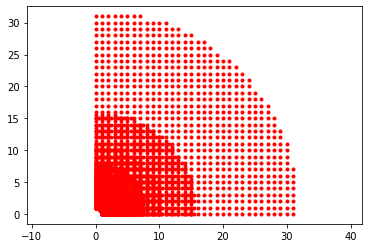

In [46]:
import numpy as np
import satx as cnf
import matplotlib.pyplot as plt

dim = 2

cnf.engine(10)

ps = cnf.vector(size=dim, signed=False, is_rational=True)

assert sum([p ** dim for p in ps]) <= 1

dots = []
while cnf.satisfy():
    dots.append(np.vectorize(float)(ps))

x, y = zip(*dots)
plt.axis('equal')
plt.plot(x, y, 'r.')
plt.show()

# NP-COMPLETE PROBLEMS

NP-Complete problem, any of a class of computational problems for which no efficient solution algorithm has been found. Many significant computer - science problems belong to this class—e.g., the traveling salesman problem, satisfiability problems, and graph - covering problems.

https://en.wikipedia.org/wiki/NP-completeness

# SATISFIABILITY

Study of boolean functions generally is concerned with the set of truth assignments(assignments of 0 or 1 to each of the variables) that make the function true.

https://en.wikipedia.org/wiki/Boolean_satisfiability_problem

In [48]:
import functools
import operator

import satx as cnf

n, m, sat = 10, 24, [[9, -5, 10, -6, 3],
                     [6, 8],
                     [8, 4],
                     [-10, 5],
                     [-9, 8],
                     [-9, -3],
                     [-2, 5],
                     [6, 4],
                     [-2, -1],
                     [7, -2],
                     [-9, 4],
                     [-1, -10],
                     [-3, 4],
                     [7, 5],
                     [6, -3],
                     [-10, 7],
                     [-1, 7],
                     [8, -3],
                     [-2, -10],
                     [-1, 5],
                     [-7, 1, 9, -6, 3],
                     [-9, 6],
                     [-8, 10, -5, -4, 2],
                     [-4, -7, 1, -8, 2]]

cnf.engine(bits=1)
x = cnf.tensor(dimensions=(n,))
assert functools.reduce(operator.iand, (functools.reduce(operator.ior, (x[[abs(lit) - 1]](lit < 0, lit > 0) for lit in cls)) for cls in sat)) == 1
if cnf.satisfy(turbo=True):
    print('SAT')
    print(' '.join(map(str, [(i + 1) if b else -(i + 1) for i, b in enumerate(x.binary)])) + ' 0')
else:
    print('UNSAT')

SAT
-1 2 -3 4 5 -6 7 8 -9 -10 0


# k-CLIQUE

Input: Graph $G$, positive integer $k$

Property: $G$ has a set of mutually adjacent nodes.

https://en.wikipedia.org/wiki/Clique_problem

In [50]:
import satx as cnf

# Ths bits of the clique to search
k = 3

# Get the graph, and the dimension for the graph
n, matrix = 5, [(1, 0), (0, 2), (1, 4), (2, 1), (4, 2), (3, 2)]

# Ensure the problem can be represented
cnf.engine(bits=k.bit_length() + 1)

# Declare an integer of n-bits
bits = cnf.natural(bits=n)

# The bits integer have "bits"-active bits, i.e, the clique has "bits"-elements
assert sum(cnf.switch(bits, i) for i in range(n)) == k

# This entangles all elements that are joined together
for i in range(n - 1):
    for j in range(i + 1, n):
        if (i, j) not in matrix and (j, i) not in matrix:
            assert cnf.switch(bits, i) + cnf.switch(bits, j) <= 1

if cnf.satisfy(turbo=True):
    print(k)
    print(' '.join([str(i) for i in range(n) if not bits.binary[i]]))
else:
    print('Infeasible ...')

3
1 2 4


# VERTEX COVER

In the mathematical discipline of graph theory, a vertex cover (sometimes node cover) of a graph is a set of vertices that includes at least one endpoint of every edge of the graph. The problem of finding a minimum vertex cover is a classical optimization problem in computer science and is a typical example of an NP-hard optimization problem that has an approximation algorithm. Its decision version, the vertex cover problem, was one of Karp's 21 NP-complete problems and is therefore a classical NP-complete problem in computational complexity theory. Furthermore, the vertex cover problem is fixed-parameter tractable and a central problem in parameterized complexity theory.

https://en.wikipedia.org/wiki/Vertex_cover

In [51]:
import satx as cnf

# Get the graph and dimension, and the bits of the cover.
n, graph, vertex, k = 5, [(1, 0), (0, 2), (1, 4), (2, 1), (4, 2), (3, 2)], [0, 1, 2, 3, 4], 3

# Ensure the problem can be represented
cnf.engine(bits=n.bit_length() + 1)

# An integer with n-bits to store the indexes for the cover
index = cnf.natural(bits=n)

# This entangled the all possible covers
for i, j in graph:
    assert cnf.switch(index, vertex.index(i), neg=True) + cnf.switch(index, vertex.index(j), neg=True) >= 1

# Ensure the cover has bits k
assert sum(cnf.switch(index, vertex.index(i), neg=True) for i in vertex) == k

if cnf.satisfy(turbo=True):
    opt = sum(index.binary)
    print('p bits {}'.format(opt))
    print(' '.join([str(vertex[i]) for i in range(n) if index.binary[i]]))
else:
    print('Infeasible ...')

p bits 3
1 2 4


# MULTIDIMENSIONAL LATIN SQUARES

In combinatorics and in experimental design, a Latin square is an n × n array filled with n different symbols, each occurring exactly once in each row and exactly once in each column.

https://en.wikipedia.org/wiki/Latin_square

In [52]:
import numpy as np
import satx as cnf

n = 6
m = 3

cnf.engine(n.bit_length())

Y = cnf.vector(size=n ** m, signed=False)

cnf.apply_single(Y, lambda k: k < n)

Y = np.reshape(Y, newshape=(m * [n]))

for i in range(n):
    cnf.all_different(Y[i])
    cnf.all_different(Y.T[i])
    for j in range(n):
        cnf.all_different(Y[i][j])
        cnf.all_different(Y.T[i][j])

for idx in cnf.hyper_loop(m - 1, n):
    s = Y
    for i in idx:
        s = s[i]
        cnf.all_different(s)
        cnf.all_different(s.T)

if cnf.satisfy(turbo=True):
    y = np.vectorize(int)(Y).reshape(m * [n])
    print(y)
else:
    print('Infeasible ...')

/usr/local/lib/python3.7/dist-packages/satx/stdlib.py:465: RuntimeWarning: invalid value encountered in not_equal
  csp.apply(args, dual=lambda x, y: x != y)


[[[4 3 1 0 5 2]
  [5 0 3 2 1 4]
  [2 1 4 5 0 3]
  [1 2 0 3 4 5]
  [0 5 2 4 3 1]
  [3 4 5 1 2 0]]

 [[3 1 5 4 2 0]
  [2 4 0 5 3 1]
  [0 3 1 2 4 5]
  [4 5 2 1 0 3]
  [5 2 3 0 1 4]
  [1 0 4 3 5 2]]

 [[0 5 3 2 1 4]
  [3 2 1 4 0 5]
  [1 4 0 3 5 2]
  [2 0 4 5 3 1]
  [4 3 5 1 2 0]
  [5 1 2 0 4 3]]

 [[2 4 0 1 3 5]
  [0 1 5 3 4 2]
  [3 5 2 0 1 4]
  [5 3 1 4 2 0]
  [1 0 4 2 5 3]
  [4 2 3 5 0 1]]

 [[5 0 2 3 4 1]
  [1 5 4 0 2 3]
  [4 2 5 1 3 0]
  [0 1 3 2 5 4]
  [3 4 1 5 0 2]
  [2 3 0 4 1 5]]

 [[1 2 4 5 0 3]
  [4 3 2 1 5 0]
  [5 0 3 4 2 1]
  [3 4 5 0 1 2]
  [2 1 0 3 4 5]
  [0 5 1 2 3 4]]]


# TRAVELLING SALESMAN PROBLEM WITH HESS ALGORITHM (O. RIVEROS)

https://independent.academia.edu/oarr

The travelling salesman problem asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?" It is an NP-hard problem in combinatorial optimization, important in operations research and theoretical computer science.

https://en.wikipedia.org/wiki/Travelling_salesman_problem

PEQNP include a full implementation of the HESS black-box algorithm for more advanced examples see here https://github.com/maxtuno/hess

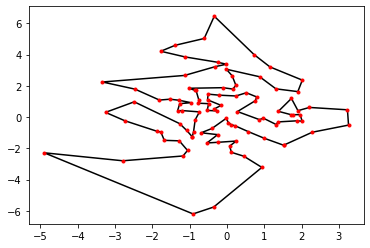

In [53]:
import satx as cnf
import numpy as np
import matplotlib.pyplot as plt

n = 100
data = np.random.logistic(size=(n, 2))
seq = cnf.hess_sequence(n, oracle=lambda seq: sum(np.linalg.norm(data[seq[i - 1]] - data[seq[i]]) for i in range(n)), fast=False)
x, y = zip(*[data[i] for i in seq + [seq[0]]])
plt.plot(x, y, 'k-')
plt.plot(x, y, 'r.')
plt.show()

37 [0, 6, 5, 4, 1, 2, 3] [7, 10, 7, 1, 2, 3, 7]


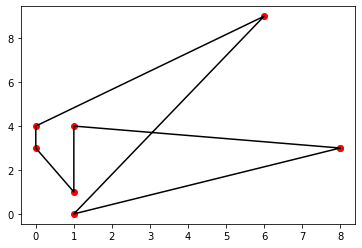

36 [6, 3, 4, 5, 1, 0, 2] [4, 1, 7, 8, 8, 7, 1]


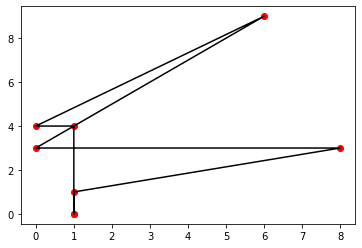

33 [2, 4, 1, 6, 5, 0, 3] [3, 1, 3, 10, 6, 7, 3]


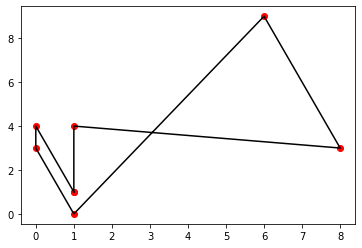

32 [2, 4, 1, 5, 0, 6, 3] [3, 1, 8, 6, 7, 4, 3]


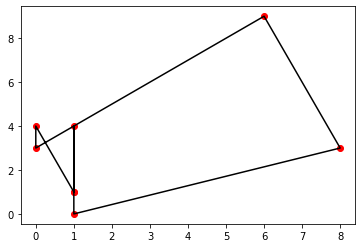

31 [2, 6, 3, 1, 5, 0, 4] [1, 4, 1, 8, 6, 8, 3]


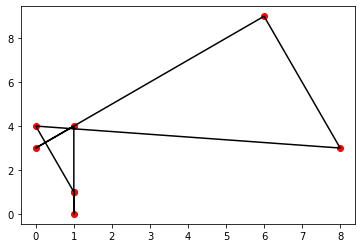

28 [6, 5, 0, 3, 4, 1, 2] [10, 6, 7, 1, 1, 2, 1]


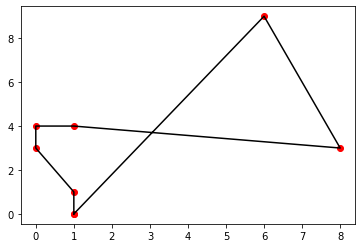

26 [3, 4, 5, 0, 2, 6, 1] [1, 7, 6, 7, 1, 3, 1]


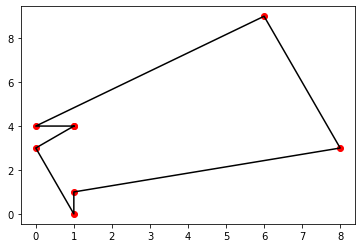

25 [1, 2, 6, 0, 5, 4, 3] [2, 1, 7, 6, 7, 1, 1]


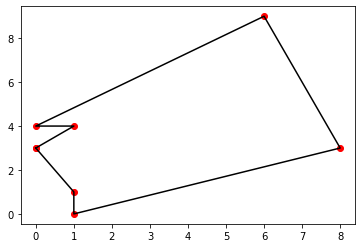

In [7]:
import numpy as np
import satx as cnf
import matplotlib.pyplot as plt


n = 7

data = np.random.randint(0, 10, size=(n, 2))
matrix = np.zeros(shape=(n, n))
for i in range(n):
    for j in range(n):
        matrix[i][j] = int(np.linalg.norm(data[i] - data[j]))

opt = 100
while True:
    cnf.engine(int(sum(matrix.flatten())).bit_length() + 1)
    x, y = cnf.matrix_permutation(matrix.flatten(), n)
    assert sum(y) < opt
    if cnf.satisfy(turbo=True):
        opt = sum(y)
        print(opt, x, y)

        a, b = zip(*[data[i.value] for i in x + [x[0]]])
        plt.plot(a, b, 'ro')
        plt.plot(a, b, 'k-')
        plt.show()
        plt.close()

        cnf.clear(x)
        cnf.clear(y)
    else:
        break

# KNAPSACK PROBLEM

The knapsack problem is a problem in combinatorial optimization: Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible. It derives its name from the problem faced by someone who is constrained by a fixed-size knapsack and must fill it with the most valuable items.

https://en.wikipedia.org/wiki/Knapsack_problem

In [8]:
import satx as cnf
import numpy as np

n = 50
values = abs(np.random.logistic(size=n))
profit = abs(np.random.logistic(size=n))
capacity = np.random.sample()
cnf.engine()
selects = cnf.vector(size=n, is_mip=True)
cnf.apply_single(selects, lambda x: x <= 1)
assert np.dot(values, selects) <= capacity
opt = cnf.maximize(np.dot(profit, selects))
slots = list(map(int, selects))
print('PROFIT  : {} vs {}'.format(np.dot(profit, slots), opt))
print('VALUES  : {} <= {}'.format(np.dot(values, slots), capacity))
print('SELECT  : {}'.format(slots))

PROFIT  : 5.321848000095805 vs 5.321848000095805
VALUES  : 0.0960529612674785 <= 0.1116652628494823
SELECT  : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]


# MAGIC SQUARE


In recreational mathematics and combinatorial design, a magic square is a $n\times n$ square grid (where n is the number of cells on each side) filled with distinct positive integers in the range 
${1,2,...,n^{2}}$ such that each cell contains a different integer and the sum of the integers in each row, column and diagonal is equal.

https://en.wikipedia.org/wiki/Magic_square

In [9]:
import satx as cnf
import numpy as np

n = 3

cnf.engine(5)

c = cnf.natural()

xs = cnf.matrix(dimensions=(n, n), signed=False)

cnf.apply_single(cnf.flatten(xs), lambda x: x > 0)
cnf.all_different(cnf.flatten(xs))

for i in range(n):
    assert sum(xs[i][j] for j in range(n)) == c
for j in range(n):
    assert sum(xs[i][j] for i in range(n)) == c

assert sum(xs[i][i] for i in range(n)) == c
assert sum(xs[i][n - 1 - i] for i in range(n)) == c

if cnf.satisfy(turbo=True):
    print(c)
    print(np.vectorize(int)(xs))
else:
    print('Infeasible ...')

24
[[13  5  6]
 [ 1  8 15]
 [10 11  3]]


# SCHUR TRIPLES PROBLEM:

Input: list of 3N distinct positive integers

Question: Is there a partition of the list into N triples $(a_i, b_i, c_i)$ such that $a_i+b_i=c_i$

The condition that all numbers must be distinct makes the problem very interesting and McDiarmid calls it a surprisingly troublesome.

https://cstheory.stackexchange.com/questions/16253/list-of-strongly-np-hard-problems-with-numerical-data

In [11]:
import satx as cnf
import numpy as np

bits = 7
size = 3 * 10
triplets = []
while len(triplets) < size:
    a = np.random.randint(1, 2 ** bits)
    b = np.random.randint(1, 2 ** bits)
    if a != b and a not in triplets and b not in triplets and a + b not in triplets:
        triplets += [a, b, a + b]
triplets.sort()
print(triplets)
cnf.engine(bits=max(triplets).bit_length() + 1)
xs, ys = cnf.permutations(triplets, size)
for i in range(0, size, 3):
    assert ys[i] + ys[i + 1] == ys[i + 2]
if cnf.satisfy(turbo=True):
    for i in range(0, size, 3):
        print('{} == {} + {}'.format(ys[i + 2], ys[i], ys[i + 1]))
else:
    print('Infeasible ...')

[4, 7, 10, 20, 23, 27, 29, 37, 40, 43, 50, 56, 59, 61, 69, 70, 76, 100, 105, 109, 114, 116, 118, 123, 125, 127, 128, 137, 157, 170]
157 == 43 + 114
137 == 100 + 37
56 == 29 + 27
127 == 123 + 4
170 == 61 + 109
128 == 23 + 105
69 == 10 + 59
70 == 20 + 50
125 == 7 + 118
116 == 76 + 40


# SUBSET SUM PROBLEM

In this problem, there is a given set with some integer elements. And another some value is also provided, we have to find a subset of the given set whose sum is the same as the given sum value.

https://en.wikipedia.org/wiki/Subset_sum_problem

In [12]:
import satx as cnf
import numpy as np

universe = np.random.randint(1, 1000, size=32)
t = np.random.randint(min(universe), sum(universe))

print(t, universe)

cnf.engine(t.bit_length())

subset = cnf.subsets(universe)

assert sum(subset) == t

if cnf.satisfy(turbo=True):
    print(sum(subset), subset)
else:
    print('Infeasible ...')

6605 [ 80 588 796 304 206 946 763 493 327 518 741  99 648  98 292 442 892 997
 164 382   7  46  88 303 507 582  34 152 982   7 170 882]
6605 [80, 588, 796, 304, 0, 0, 763, 493, 327, 518, 0, 0, 0, 98, 292, 0, 0, 0, 0, 0, 7, 46, 0, 0, 507, 582, 0, 152, 0, 0, 170, 882]


# PERMUTATION RECONSTRUCTION FROM DIFFERENCES

https://arxiv.org/pdf/1410.6396.pdf

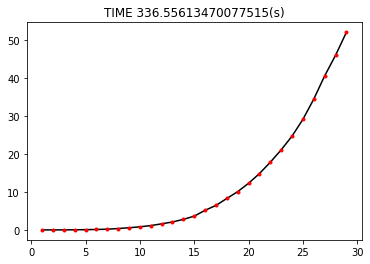

In [13]:
import satx as cnf
import numpy as np
import matplotlib.pyplot as plt

def gen_instance(n):
    import random
    y = list(range(1, n + 1))
    random.shuffle(y)
    return [abs(y[i + 1] - y[i]) for i in range(n - 1)]


import time
start = time.time()
times = []
sizes = []
for n in range(1, 30):
    diffs = gen_instance(n)
    ini = time.time()
    cnf.engine(n.bit_length() + 1)
    x = cnf.vector(size=n, signed=False)
    cnf.all_different(x)
    cnf.apply_single(x, lambda a: 1 <= a <= n)
    for i in range(n - 1):
        assert cnf.index(i, diffs) == cnf.one_of([x[i + 1] - x[i], x[i] - x[i + 1]])
    if cnf.satisfy(turbo=True):
        end = time.time() - ini
        xx = [abs(x[i + 1] - x[i]) for i in range(n - 1)]
        if xx == diffs:
            sizes.append(n)
            times.append(end)
        else:
            raise Exception('Error!')
    else:
        raise Exception('Error!')
end = time.time() - start
plt.title('TIME {}(s)'.format(end))
plt.plot(sizes, times, 'k-')
plt.plot(sizes, times, 'r.')
plt.show()
plt.close()

# HAMILTONIAN CYCLE PROBLEM

In the mathematical field of graph theory, a Hamiltonian path (or traceable path) is a path in an undirected or directed graph that visits each vertex exactly once. A Hamiltonian cycle (or Hamiltonian circuit) is a Hamiltonian path that is a cycle. Determining whether such paths and cycles exist in graphs is the Hamiltonian path problem, which is NP-complete.

https://en.wikipedia.org/wiki/Hamiltonian_path

In [14]:
import sys

import satx as cnf
import numpy as np


n = 10
M = np.random.randint(0, 2, size=(n, n))

print(M)

cnf.engine((n ** 2).bit_length())
ids, elements = cnf.matrix_permutation((1 - M).flatten(), n)

assert sum(elements) == 0

if cnf.satisfy(turbo=True):
    for i in ids:
        for j in ids:
            sys.stdout.write('{} '.format(M[i.value][j.value]))
        sys.stdout.write('\n') 
    sys.stdout.write('\n')
else:
    print('Infeasible ...')

[[1 0 0 1 1 1 0 1 0 0]
 [0 0 0 1 1 1 0 0 1 1]
 [0 0 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 0 0 1 1 0]
 [0 0 0 0 1 1 1 0 1 0]
 [1 0 1 0 0 0 1 1 1 1]
 [1 1 1 0 0 1 0 1 1 1]
 [1 1 0 0 0 1 1 0 0 1]
 [1 0 1 0 1 0 1 1 0 1]
 [0 1 0 1 0 1 0 0 1 0]]
0 1 1 0 1 0 1 1 0 1 
0 0 1 0 0 1 0 1 1 1 
0 1 1 1 1 1 0 0 0 0 
1 1 0 1 1 0 0 0 0 0 
1 0 0 0 1 1 0 1 0 0 
1 1 1 0 0 0 1 1 0 1 
1 1 0 1 1 1 1 1 0 1 
1 1 1 0 0 1 1 0 1 1 
1 0 0 1 1 1 0 0 0 1 
1 0 0 1 0 1 0 0 1 0 



# BIN PACKING PROBLEM

In the bin packing problem, items of different volumes must be packed into a finite number of bins or containers each of a fixed given volume in a way that minimizes the number of bins used. In computational complexity theory, it is a combinatorial NP-hard problem. The decision problem (deciding if items will fit into a specified number of bins) is NP-complete.

https://en.wikipedia.org/wiki/Bin_packing_problem

In [22]:
import peqnp as cnf
import numpy as np

capacity = 50
size = 50
elements = sorted([np.random.randint(1, capacity // 2 - 1) for _ in range(size)], reverse=True)
print(capacity)
print(elements)
bins = int(np.ceil(sum(elements) / capacity))
while True:
    cnf.engine(bits=capacity.bit_length() + 1)
    slots = cnf.vector(bits=len(elements), size=bins)
    for i in range(len(elements)):
        assert sum(cnf.switch(slot, i) for slot in slots) == 1
    for slot in slots:
        assert sum(cnf.switch(slot, i) * elements[i] for i in range(len(elements))) <= capacity
    if cnf.satisfy(turbo=True):
        print('Solution for {} bins...'.format(bins))
        for slot in slots:
            print(''.join(['_' if boolean else '#' for boolean in slot.binary]))
        for slot in slots:
            sub = [item for i, item in enumerate(elements) if not slot.binary[i]]
            print(sum(sub), sub)
        break
    else:
        print('No solution for {} bins...'.format(bins))
        bins += 1

50
[21, 21, 21, 20, 20, 19, 19, 18, 18, 18, 17, 17, 16, 15, 15, 15, 14, 14, 14, 14, 14, 13, 13, 13, 12, 12, 11, 10, 10, 10, 9, 9, 9, 8, 7, 6, 6, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 1]
Solution for 12 bins...
_____________________________________________#____
#________________________________#________________
__________________________________________________
__________________________________________________
__________________________________________________
___________________________________________#______
__________________________________________________
_________________________#_#______#___#_#_________
____#____#__##_____#_###__________________________
_____####_##______#_______________________________
__##__________####__#__________#__________________
_#______________________#_#_###_#__###_#_##_#_####
3 [3]
29 [21, 8]
0 []
0 []
0 []
4 [4]
0 []
39 [12, 10, 7, 5, 5]
122 [20, 18, 16, 15, 14, 13, 13, 13]
122 [19, 19, 18, 18, 17, 17, 14]
122 [21, 20, 15, 15, 14, 14, 14, 9]
123 [21, 1

# ZERO-ONE INTEGER PROGRAMMING DEFINITION

Zero-one integer programming (which can also be written as 0-1 integer programming) is a mathematical method of using a series of binary, yes (1) and no (0) answers to arrive at a solution when there are two mutually exclusive options.

https://en.wikipedia.org/wiki/Integer_programming

In [27]:
import satx as cnf
import numpy as np

n, m = 10, 5
cc = np.random.randint(0, 1000, size=(n, m))
d = np.dot(cc, np.random.randint(0, 2, size=(m,)))
print(cc)
print(d)
cnf.engine(bits=int(np.sum(cc)).bit_length() + 1)
xs = cnf.vector(size=m)
cnf.all_binaries(xs)
assert (np.dot(cc, xs) == d).all()
if cnf.satisfy():
    print(xs)
    print('Proof:')
    print(np.dot(cc, xs))
else:
    print('Infeasible...')

[[448 871 756 596 289]
 [131 588 418  50 868]
 [276 739 255 368 264]
 [712 233 219 179 730]
 [418 127 201 112 520]
 [162 597  94 955 733]
 [813 967 479 191 554]
 [ 57  44 275 351 104]
 [446 275  18 741 135]
 [828 138 636 692  31]]
[756 418 255 219 201  94 479 275  18 636]
[0, 0, 1, 0, 0]
Proof:
[756 418 255 219 201 94 479 275 18 636]


# n-QUEENS COMPLETION PROBLEM

The n- Queens Completion problem is a variant, dating to 1850, in which some queens are already placed and the solver is asked to place the rest, if possi- ble. ... The n-Queens problem is to place n chess queens on an n by n chessboard so that no two queens are on the same row, column or diagonal.

https://www.ijcai.org/Proceedings/2018/0794.pdf

In [28]:
import satx as cnf


def completion(n, m, seed):
    import random
    """
    http://www.csplib.org/Problems/prob079/data/queens-gen-fast.py.html
    """
    random.seed(seed)

    d1 = [0 for _ in range(2 * n - 1)]
    d2 = [0 for _ in range(2 * n - 1)]

    valid_rows = [i for i in range(n)]
    valid_cols = [j for j in range(n)]

    def no_attack(r, c):
        return d1[r + c] == 0 and d2[r - c + n - 1] == 0

    pc = []
    queens_left = n

    for attempt in range(n * n):
        i = random.randrange(queens_left)
        j = random.randrange(queens_left)
        r = valid_rows[i]
        c = valid_cols[j]
        if no_attack(r, c):
            pc.append([r, c])
            d1[r + c] = 1
            d2[r - c + n - 1] = 1
            valid_rows[i] = valid_rows[queens_left - 1]
            valid_cols[j] = valid_cols[queens_left - 1]
            queens_left -= 1
            if len(pc) == m:
                return [[x + 1, y + 1] for x, y in pc]

def show(pc):
    table = ''
    for i in range(1, n + 1):
        table += ''
        for j in range(1, n + 1):
            if [i, j] not in pc:
                table += '. '
            else:
                table += 'Q '
        table += '\n'
    print(table)
    print('# seed = {}'.format(seed))
    
n, m, seed = 30, 15, 0
placed_queens = completion(n, m, seed)
show(placed_queens)
cnf.engine(bits=n.bit_length() + 1)
qs = cnf.vector(size=n, signed=False)
for (a, b) in placed_queens:
    assert qs[a - 1] == b - 1
cnf.apply_single(qs, lambda x: x < n)
cnf.apply_dual(qs, lambda x, y: x != y)
cnf.apply_dual([qs[i] + i for i in range(n)], lambda x, y: x != y)
cnf.apply_dual([qs[i] - i for i in range(n)], lambda x, y: x != y)
if cnf.satisfy(turbo=True):
    for i in range(n):
        print(''.join(['Q ' if qs[i] == j else '. ' for j in range(n)]))
    print('')
else:
    print('Infeasible ...')

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q 
. . . . . . . . . . . . 

# MULTIDIMENSIONAL KNAPSACK PROBLEM

https://link.springer.com/chapter/10.1007/978-3-540-24777-7_9

In [29]:
import numpy as np
import satx as cnf

n = 90
m = 5

z = 11191
c = [360, 83, 59, 130, 431, 67, 230, 52, 93, 125, 670, 892, 600, 38, 48, 147, 78, 256, 63, 17, 120, 164, 432, 35, 92, 110, 22, 42, 50, 323, 514, 28, 87, 73, 78, 15, 26, 78, 210, 36, 85, 189, 274, 43, 33, 10, 19, 389, 276, 312, 94, 68, 73, 192, 41, 163, 16, 40, 195, 138, 73, 152, 400, 26, 14, 170, 205, 57, 369, 435, 123, 25, 94, 88, 90, 146, 55, 29, 82, 74, 100, 72, 31, 29, 316, 244, 70, 82, 90, 52]

b = [2100, 1100, 3300, 3700, 3600]
a = [[7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0, 42, 47, 52, 32, 26, 48, 55, 6, 29, 84, 2, 4, 18, 56, 7, 29, 93, 44, 71, 3, 86, 66, 31, 65, 0, 79, 20, 65, 52, 13, 48, 14, 5, 72, 14, 39, 46, 27, 11, 91, 15, 25, 0, 94, 53, 48, 27, 99, 6, 17, 69, 43, 0, 57, 7, 21, 78, 10, 37, 26, 20, 8, 4, 43, 17, 25, 36, 60, 84, 40],
     [8, 66, 98, 50, 0, 30, 0, 88, 15, 37, 26, 72, 61, 57, 17, 27, 83, 3, 9, 66, 97, 42, 2, 44, 71, 11, 25, 74, 90, 20, 0, 38, 33, 14, 9, 23, 12, 58, 6, 14, 78, 0, 12, 99, 84, 31, 16, 7, 33, 20, 5, 18, 96, 63, 31, 0, 70, 4, 66, 9, 15, 25, 2, 0, 48, 1, 40, 31, 82, 79, 56, 34, 3, 19, 52, 36, 95, 6, 35, 34, 74, 26, 10, 85, 63, 31, 22, 9, 92, 18],
     [3, 74, 88, 50, 55, 19, 0, 6, 30, 62, 17, 81, 25, 46, 67, 28, 36, 8, 1, 52, 19, 37, 27, 62, 39, 84, 16, 14, 21, 5, 60, 82, 72, 89, 16, 5, 29, 7, 80, 97, 41, 46, 15, 92, 51, 76, 57, 90, 10, 37, 25, 93, 5, 39, 0, 97, 6, 96, 2, 81, 69, 4, 32, 78, 65, 83, 62, 89, 45, 53, 52, 76, 72, 23, 89, 48, 41, 1, 27, 19, 3, 32, 82, 20, 2, 51, 18, 42, 4, 26],
     [21, 40, 0, 6, 82, 91, 43, 30, 62, 91, 10, 41, 12, 4, 80, 77, 98, 50, 78, 35, 7, 1, 96, 67, 85, 4, 23, 38, 2, 57, 4, 53, 0, 33, 2, 25, 14, 97, 87, 42, 15, 65, 19, 83, 67, 70, 80, 39, 9, 5, 41, 31, 36, 15, 30, 87, 28, 13, 40, 0, 51, 79, 75, 43, 91, 60, 24, 18, 85, 83, 3, 85, 2, 5, 51, 63, 52, 85, 17, 62, 7, 86, 48, 2, 1, 15, 74, 80, 57, 16],
     [94, 86, 80, 92, 31, 17, 65, 51, 46, 66, 44, 3, 26, 0, 39, 20, 11, 6, 55, 70, 11, 75, 82, 35, 47, 99, 5, 14, 23, 38, 94, 66, 64, 27, 77, 50, 28, 25, 61, 10, 30, 15, 12, 24, 90, 25, 39, 47, 98, 83, 56, 36, 6, 66, 89, 45, 38, 1, 18, 88, 19, 39, 20, 1, 7, 34, 68, 32, 31, 58, 41, 99, 92, 67, 33, 26, 25, 68, 37, 6, 11, 17, 48, 79, 63, 77, 17, 29, 18, 60]]


cnf.engine()
xs = np.asarray(cnf.vector(size=n, is_mip=True))
cnf.apply_single(xs, lambda x: x <= 1)
for i in range(m):
    assert np.dot(a[i], xs) <= b[i]
assert np.dot(c, xs) <= z
print(cnf.maximize(np.dot(c, xs)))
print(xs)

11190.999999999995
[1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0
 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1]


# PARTITION PROBLEM

n number theory and computer science, the partition problem, or number partitioning, is the task of deciding whether a given multiset $S$ of positive integers can be partitioned into two subsets $S_1$ and $S_2$ such that the sum of the numbers in $S_1$ equals the sum of the numbers in $S_2$.

https://en.wikipedia.org/wiki/Partition_problem

In [33]:
import numpy as np
import satx as cnf

size = 20

data = np.random.randint(1000, size=size)

print(data)

cnf.engine(int(sum(data)).bit_length() + 1)

sub, com = cnf.subsets(data, complement=True)

assert sum(sub) == sum(com)

if cnf.satisfy():
    print(sum(sub), sub)
    print(sum(com), com)
else:
    print('Infeasible ...')

[642 815  51 440 585 838 245 106 268  82 764 850 584  25 590 624 189 265
 780 191]
4467 [0, 0, 0, 0, 585, 0, 0, 0, 0, 0, 0, 850, 584, 0, 590, 624, 189, 265, 780, 0]
4467 [642, 815, 51, 440, 0, 838, 245, 106, 268, 82, 764, 0, 0, 25, 0, 0, 0, 0, 0, 191]


# OPTIMAL FACILITY SELECTION & LOCATION PROBLEM

Gibe a set of facilities, select a number of them such that be optimal in terms of distance to demands.

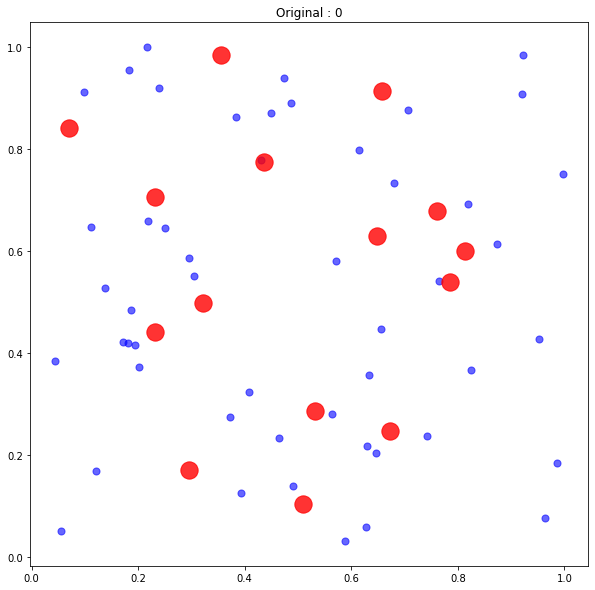

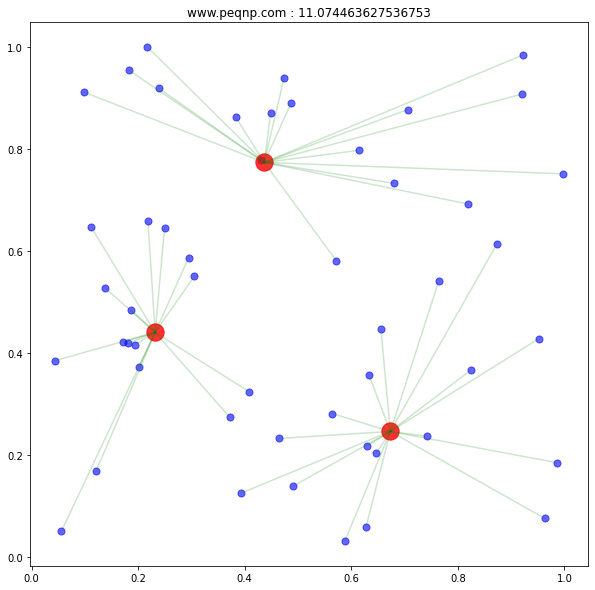

In [34]:
import numpy as np
import satx as cnf
import matplotlib.pyplot as plt


def plot(I, J=None, X=None, title='Original', obj=0):
    plt.figure(figsize=(10, 10))
    plt.title('{} : {}'.format(title, obj))
    a, b = zip(*I)
    plt.scatter(a, b, c='blue', s=50, alpha=0.6)
    if J is not None:
        if X is not None:
            for i in range(m):
                for j in range(n):
                    if X[i][j]:
                        plt.plot([I[i][0], J[j][0]], [I[i][1], J[j][1]], 'g-',alpha=0.2)
        a, b = zip(*J)
        plt.scatter(a, b, c='red', s=300, alpha=0.8)
    else:
        a, b = zip(*J)
        plt.scatter(a, b, c='red', s=300, alpha=0.8)
    plt.show()
    plt.close()


def oracle(seq):
    global O, glb, n
    M = np.zeros(shape=(m, n))
    for i in range(m):
        for j in range(n):
            M[i][j] = np.linalg.norm(I[i] - J[seq[j]])
    cnf.engine()
    X = np.asarray(cnf.matrix(dimensions=(m, n), is_mip=True))
    cnf.all_binaries(X.flatten())
    assert sum(X.flatten()) == m
    assert (X.sum(axis=1) == 1).all()
    obj = cnf.minimize(sum(X[i][j] * M[i][j] for i in range(m) for j in range(n)))
    O = np.vectorize(int)(X)
    return obj

m = 50
k = 15
n = 3
I = np.random.sample(size=(m, 2))    
J = np.random.sample(size=(k, 2))
plot(I, J)
seq = cnf.hess_sequence(k, oracle=oracle, fast=False)
plot(I, J[seq][:n], O, 'www.peqnp.com', oracle(seq))

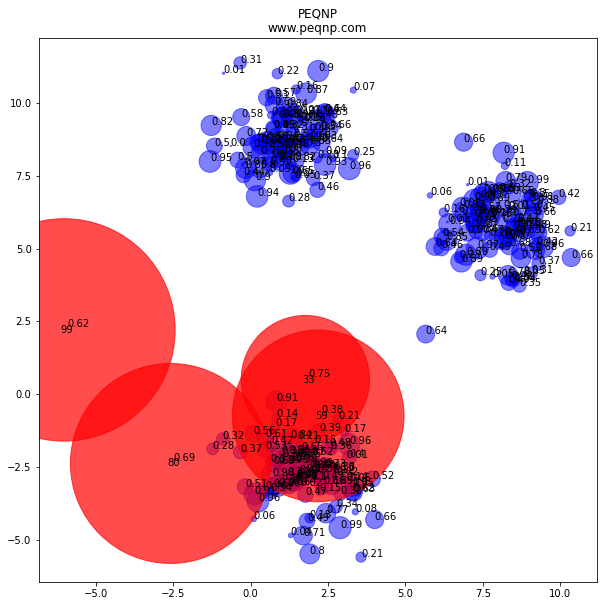

-507.7866531823405


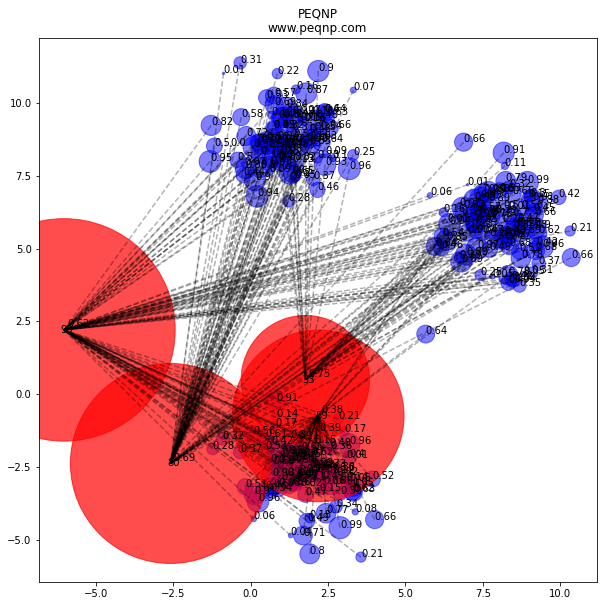

In [35]:
import numpy as np
import satx as cnf
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


def plot(X=None):
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.title('PEQNP\nwww.peqnp.com')
    plt.scatter(N[:, 0], N[:, 1], c='b', s=P * 500, alpha=0.5)
    for i in range(m):
        ax.annotate(str(round(P[i], 2)), (N[:, 0][i], N[:, 1][i]), size=10)
    plt.scatter(M[:, 0], M[:, 1], c='r', s=L * 500, alpha=0.7)
    for i in range(n):
        ax.annotate(str(round(T[i], 2)), (M[:, 0][i] + 0.1, M[:, 1][i] + 0.1))
        ax.annotate(str(L[i]), (M[:, 0][i] - 0.1, M[:, 1][i] - 0.1))
    if X is not None:
        for i in range(m):
            for j in range(n):
                if X[i][j]:
                    plt.plot([N[i][0], M[j][0]], [N[i][1], M[j][1]], 'k--', alpha=0.3)
    plt.show()


n = 4

L = np.random.randint(1, 100, size=n)  # capacity x facilities

m = sum(L)

N, _ = make_blobs(n_samples=m)  # customers
P = np.random.sample(size=m)  # priorities x customers
M = np.random.normal(size=(n, 2)) * n  # facilities
T = np.random.sample(size=n)  # priorities x facility
C = np.zeros(shape=(m, n))
for i in range(m):
    for j in range(n):
        C[i][j] = np.linalg.norm(N[i] - M[j])

D = np.zeros(shape=(m, n))
for i in range(m):
    for j in range(n):
        D[i][j] = P[i] - T[j]

plot()

cnf.engine()
X = np.asarray(cnf.matrix(dimensions=(m, n), is_mip=True))
cnf.all_binaries(X.flatten())
assert (X.sum(axis=0) <= L).all()
assert (X.sum(axis=1) == 1).all()
print(cnf.minimize((X * C * D).sum()))
plot(np.vectorize(int)(X))

# SUDOKU 

is a logic-based, combinatorial number-placement puzzle. The objective is to fill a 9×9 grid with digits so that each column, each row, and each of the nine 3×3 subgrids that compose the grid (also called "boxes", "blocks", or "regions") contain all of the digits from 1 to 9. The puzzle setter provides a partially completed grid, which for a well-posed puzzle has a single solution.

Completed games are always an example of a Latin square which include an additional constraint on the contents of individual regions. For example, the same single integer may not appear twice in the same row, column, or any of the nine 3×3 subregions of the 9×9 playing board.

https://en.wikipedia.org/wiki/Sudoku

In [36]:
import numpy as np
import satx as cnf


def expand_line(line):
    return line[0] + line[5:9].join([line[1:5] * (base - 1)] * base) + line[9:13]


def show(board):
    import string
    line0 = expand_line('╔═══╤═══╦═══╗')
    line1 = expand_line('║ . │ . ║ . ║')
    line2 = expand_line('╟───┼───╫───╢')
    line3 = expand_line('╠═══╪═══╬═══╣')
    line4 = expand_line('╚═══╧═══╩═══╝')

    symbol = ' ' + string.printable.replace(' ', '')
    nums = [[''] + [symbol[n] for n in row] for row in board]
    print(line0)
    for r in range(1, side + 1):
        print("".join(n + s for n, s in zip(nums[r - 1], line1.split('.'))))
        print([line2, line3, line4][(r % side == 0) + (r % base == 0)])


def generate(base):
    # pattern for a baseline valid solution
    def pattern(r, c):
        return (base * (r % base) + r // base + c) % side

    # randomize rows, columns and numbers (of valid base pattern)
    from random import sample

    def shuffle(s):
        return sample(s, len(s))

    rBase = range(base)
    rows = [g * base + r for g in shuffle(rBase) for r in shuffle(rBase)]
    cols = [g * base + c for g in shuffle(rBase) for c in shuffle(rBase)]
    nums = shuffle(range(1, base * base + 1))

    # produce board using randomized baseline pattern
    board = [[nums[pattern(r, c)] for c in cols] for r in rows]

    squares = side * side
    empties = (squares * 3) // 4
    for p in map(int, sample(range(squares), empties)):
        board[p // side][p % side] = 0

    show(board)
    return board


base = 4
side = base * base

puzzle = np.asarray(generate(base))

cnf.engine(side.bit_length())

board = np.asarray(cnf.matrix(dimensions=(side, side), signed=False))
cnf.apply_single(board.flatten(), lambda x: 1 <= x <= side)

for i in range(side):
    for j in range(side):
        if puzzle[i][j]:
            assert board[i][j] == puzzle[i][j]

for c, r in zip(board, board.T):
    cnf.all_different(c)
    cnf.all_different(r)

for i in range(base):
    for j in range(base):
        cnf.all_different(board[i * base:(i + 1) * base, j * base:(j + 1) * base].flatten())

if cnf.satisfy(turbo=True, cnf_path='sudoku.cnf'):
    show(np.vectorize(int)(board))


╔═══╤═══╤═══╤═══╦═══╤═══╤═══╤═══╦═══╤═══╤═══╤═══╦═══╤═══╤═══╤═══╗
║   │ 1 │ 4 │   ║   │   │   │ 2 ║   │   │   │   ║ 5 │ 9 │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │   │   │ b ║   │   │ a │   ║   │   │ 2 │ 8 ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║ 8 │   │   │ d ║   │   │ f │   ║   │   │   │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │   │ 3 │   ║   │   │ b │ 5 ║   │   │ 4 │   ║ 2 │   │   │   ║
╠═══╪═══╪═══╪═══╬═══╪═══╪═══╪═══╬═══╪═══╪═══╪═══╬═══╪═══╪═══╪═══╣
║   │ 0 │   │   ║ 4 │   │   │   ║   │ 1 │ d │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║ 2 │   │   │   ║   │   │   │   ║ 0 │   │   │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║ 4 │   │ a │   ║   │   │   │ d ║   │   │   │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │   │ 

# MAXIMUM CONSTRAINED PARTITITON

---



---



http://www.csc.kth.se/~viggo/wwwcompendium/node152.html

In [38]:
import random

import satx as cnf

bits = 10
n = 2 * 100

D = [random.randint(1, 2 ** bits) for _ in range(n)]

print('D   : {}'.format(D))

cnf.engine(sum(D).bit_length())

sub, com = cnf.subsets(D, n // 2, complement=True)

assert sum(sub) == sum(com)

if cnf.satisfy(turbo=True):
    print(sum(sub), len(sub), sub)
    print(sum(com), len(com), com)
    print('\n')
else:
    print('Infeasible ...')

D   : [588, 685, 114, 74, 986, 856, 289, 1008, 168, 311, 723, 843, 73, 955, 792, 940, 97, 208, 965, 311, 42, 67, 272, 664, 216, 710, 400, 786, 1005, 228, 124, 957, 692, 255, 607, 261, 794, 602, 249, 388, 79, 803, 911, 761, 391, 933, 731, 155, 92, 82, 996, 524, 55, 443, 471, 192, 861, 626, 233, 299, 873, 865, 173, 215, 852, 129, 204, 851, 320, 63, 915, 883, 855, 62, 1018, 665, 518, 161, 722, 145, 249, 736, 61, 708, 713, 365, 21, 473, 750, 145, 294, 426, 7, 420, 253, 15, 601, 756, 51, 477, 291, 383, 930, 231, 977, 706, 529, 267, 58, 427, 742, 687, 970, 600, 607, 670, 377, 166, 211, 631, 321, 772, 301, 257, 457, 647, 498, 485, 377, 597, 763, 860, 95, 271, 43, 807, 160, 150, 271, 861, 614, 854, 292, 865, 611, 727, 174, 509, 911, 757, 119, 771, 837, 18, 855, 657, 904, 418, 762, 601, 965, 187, 380, 223, 568, 230, 316, 914, 817, 380, 864, 885, 358, 508, 929, 698, 292, 728, 948, 178, 990, 418, 604, 4, 920, 947, 16, 448, 612, 235, 617, 320, 869, 966, 190, 1020, 476, 831, 574, 45]
51066 200 [588

# PARALLEL OPTIMIZATION - MIN-MAX SUM SUBSET CARDINALITY

In [ ]:
import random
import functools
import multiprocessing
import peqnp as cnf


def ssp(k, t, data):
    cnf.engine(t.bit_length())

    idx, sub = cnf.subsets(data)

    assert sum(sub) == t
    assert sum(idx[[i]](0, 1) for i in range(len(data))) == k

    if cnf.satisfy(turbo=True):
        return k, idx
    else:
        return 0, 0


b = 16
n = 32

data = [random.randint(1, 2 ** b) for _ in range(n)]
t = sum(random.sample(data, k=n // 2))
f = functools.partial(ssp, t=t, data=data)

print(t, data)

with multiprocessing.Pool(multiprocessing.cpu_count()) as pool:
    for k, idx in pool.map(f, range(n)):
        if k == 0 or idx == 0:
            continue
        sub = [data[i] for i in range(n) if idx.binary[i]]
        print(k, t, sum(sub), sub)

432759 [37630, 43782, 7279, 4710, 63089, 54771, 18469, 64466, 10699, 19841, 46239, 53889, 4612, 61117, 50684, 60147, 6165, 13302, 61721, 19841, 2652, 4256, 17394, 42456, 13801, 45439, 25556, 50255, 64268, 14549, 7886, 61236]
9 432759 432759 [43782, 63089, 46239, 61117, 50684, 45439, 50255, 64268, 7886]
10 432759 432759 [43782, 63089, 61117, 13302, 61721, 4256, 45439, 64268, 14549, 61236]
11 432759 432759 [43782, 18469, 64466, 10699, 19841, 53889, 61117, 50684, 61721, 2652, 45439]
12 432759 432759 [37630, 43782, 7279, 63089, 19841, 53889, 4612, 61117, 50684, 19841, 45439, 25556]
13 432759 432759 [43782, 7279, 4710, 54771, 18469, 64466, 4612, 61117, 19841, 2652, 25556, 64268, 61236]
14 432759 432759 [37630, 43782, 7279, 4710, 63089, 61117, 50684, 2652, 4256, 17394, 42456, 25556, 64268, 7886]
15 432759 432759 [37630, 18469, 64466, 10699, 19841, 46239, 53889, 4612, 61117, 6165, 2652, 17394, 13801, 14549, 61236]
16 432759 432759 [37630, 43782, 7279, 4710, 18469, 10699, 19841, 60147, 6165, 1

 # DISTIBUTED OPTIMIZATION - MIN-MAX SUM SUBSET CARDINALITY

In [ ]:
!pip install pyspark
import random
import functools
import peqnp as cnf
from pyspark.sql import SparkSession


def ssp(k, t, data):
    cnf.engine(t.bit_length())

    idx, sub = cnf.subsets(data)

    assert sum(sub) == t
    assert sum(idx[[i]](0, 1) for i in range(len(data))) == k

    if cnf.satisfy(turbo=True):
        return k, idx
    else:
        return 0, 0


if __name__ == '__main__':
    b = 16
    n = 32

    data = [random.randint(1, 2 ** b) for _ in range(n)]
    t = sum(random.sample(data, k=n // 2))
    f = functools.partial(ssp, t=t, data=data)

    print(t, data)

    spark = SparkSession.builder.appName("PEQNP").getOrCreate()

    partitions = 4

    for k, idx in spark.sparkContext.parallelize(range(n), partitions).map(f).collect():
        if k == 0 or idx == 0:
            continue
        sub = [data[i] for i in range(n) if idx.binary[i]]
        print(k, t, sum(sub), sub)


468555 [58272, 48704, 24967, 59700, 46735, 9875, 5852, 5241, 63723, 33474, 3494, 28309, 30102, 12253, 55065, 40018, 14870, 19096, 55833, 55320, 11015, 13732, 54479, 8248, 13004, 54417, 20468, 4025, 58553, 56504, 54660, 3950]
10 468555 468555 [48704, 63723, 55065, 19096, 55833, 54479, 54417, 4025, 58553, 54660]
11 468555 468555 [59700, 46735, 5852, 63723, 28309, 30102, 12253, 55065, 55833, 54479, 56504]
12 468555 468555 [58272, 48704, 59700, 9875, 63723, 33474, 14870, 55833, 11015, 54479, 54660, 3950]
13 468555 468555 [24967, 46735, 5852, 5241, 63723, 30102, 12253, 40018, 14870, 55320, 54417, 58553, 56504]
14 468555 468555 [48704, 24967, 5852, 63723, 28309, 55065, 40018, 55833, 11015, 13732, 54479, 8248, 54660, 3950]
15 468555 468555 [58272, 9875, 5852, 5241, 33474, 30102, 14870, 55833, 55320, 11015, 54479, 8248, 13004, 54417, 58553]
16 468555 468555 [59700, 9875, 5241, 63723, 33474, 3494, 12253, 55065, 19096, 55320, 13732, 54479, 20468, 4025, 54660, 3950]
17 468555 468555 [59700, 5852,

# GRIEWANK FUNCTION

Ref: https://www.sfu.ca/~ssurjano/griewank.html

In [39]:
import numpy
import satx as cnf

class GriewankFunctionHESS:

	def __init__(self, a, b):
		self.a = a
		self.b = b
	
	def oracle(self, xs):
		return numpy.sum([(x ** 2) / 4000 for x in xs]) - numpy.prod([numpy.cos(x / numpy.sqrt(i + 1)) for i, x in enumerate(xs)]) + 1

	def f(self, i, j, xs):
		xs[i], xs[j] = self.a + xs[i] / self.b, self.a + xs[j] / self.b
		xs[i:j] = xs[i:j][::-1]

	def g(self, i, j, xs):
		xs[i:j] = xs[i:j][::-1]
		xs[i], xs[j] = self.b * xs[i] - self.a, self.b * xs[j] - self.a
		
	def log(self, top, opt):
		print(top)

	def run(self, n):
		xs = numpy.random.randint(-600, 600, size=n)
		return cnf.hess_abstract(xs, self.oracle, self.f, self.g, self.log, target=0)
	
n = 100
gf = GriewankFunctionHESS(n ** -2, n ** 2)
print(gf.run(n))

3207.7372499999997
3179.0069999999996
3175.1629999999996
3113.41075
3093.3885
3086.1634999999997
3085.9532499999996
3083.1969999999997
3082.8907499999996
3021.8817499999996
3019.94575
3003.56175
3003.5615
3003.5592500000002
2999.71525
2956.45125
2927.0389999999998
2847.515
2830.874
2801.633
2760.424
2752.8549999999996
2706.41475
2634.59075
2576.7505
2536.95025
2497.74625
2472.46525
2404.86525
2334.905
2268.3410000000003
2249.297
2185.7929999999997
2170.1679999999997
2082.2557500000003
2045.3917500000002
2004.18275
1969.4005000000002
1969.3282499999998
1965.7282499999997
1955.6279999999997
1923.9440000000077
1922.8217499999896
1844.1415000000113
1844.0924999999775
1839.8022499999752
1755.4120000000253
1716.0097500000347
1708.0887500000363
1707.832749999806
1624.022499999764
1603.85850000208
1598.958500002241
1567.452249994038
1522.7199999932482
1509.1477499929747
1504.1067499929686
1416.1945000090077
1358.354250009212
1333.5479999906465
1310.4439999724727
1294.9437499718717
1294.8715000